# Import

In [1]:
from clean_data import clean_data
import pandas as pd
import numpy as np
import ta
import seaborn as sns
df = clean_data()

/Users/kyro_m3pro/Desktop/Backtesting/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import sys
sys.path.append('../../qwok/')
from visualization import Visualization as Vis
from signal_oscillator import Price_Oscillator_Signal

In [3]:
combination = []
for i in range(10, 105, 5):
    for j in range(i+5, 205, 5):
        combination.append([i, j])
len(combination)

551

In [4]:
arr_res = []
for window_short, window_long in combination:
    ema_short = ta.trend.ema_indicator(df['EB'], window=window_short, fillna=False)
    ema_long = ta.trend.ema_indicator(df['EB'], window=window_long, fillna=False)
    signals = np.select([(ema_short>ema_long), (ema_short<=ema_long)], [-1, 1], 0)
    vis_obj = Vis(df['Price'], signals, asset_name='BTC', method_pnl='cumsum')

    dict_res = {
        'Window Short':window_short,
        'Window Long':window_long,
        'Bt Obj':vis_obj,
    }
    for metrics, value in vis_obj.stat.items():
        dict_res[metrics] = value
    arr_res.append(dict_res)

df_bt = pd.DataFrame(arr_res)

,Window Short,Window Long,Bt Obj,start,end,len_timeframe,leverage,resolution(hr),count_day_tradable_yearly,long_short_ratio,...,expected_return_short,hit_rate,expected_return_hit,expected_return_miss,win_rate,sharpe_ratio,sortino_ratio,calmar_ratio,time_under_water,maximum_drawdown
38,15,20,<visualization.Visualization object at 0x16cc2...,2021-05-27,2024-04-17,1057,1,24.0,252,1.21795,...,0.00041,0.50434,0.02233,-0.02019,0.49527,0.64286,0.94287,0.68798,0.92708,0.31958
2,10,25,<visualization.Visualization object at 0x103ac...,2021-05-27,2024-04-17,1057,1,24.0,252,1.22629,...,0.00000,0.50194,0.02217,-0.02033,0.49053,0.51097,0.74106,0.52116,0.92708,0.35334
13,10,80,<visualization.Visualization object at 0x16c6a...,2021-05-27,2024-04-17,1057,1,24.0,252,1.69421,...,0.00064,0.48721,0.02249,-0.01901,0.45076,0.61002,0.92136,0.50589,0.87973,0.40320
3,10,30,<visualization.Visualization object at 0x16c4e...,2021-05-27,2024-04-17,1057,1,24.0,252,1.29464,...,0.00008,0.49951,0.02227,-0.01987,0.48580,0.60761,0.88170,0.46882,0.91667,0.44445
52,15,90,<visualization.Visualization object at 0x16cd7...,2021-05-27,2024-04-17,1057,1,24.0,252,1.75783,...,0.00023,0.49535,0.02179,-0.01963,0.45360,0.44527,0.62574,0.44275,0.85227,0.35902


<Axes: xlabel='Window Long', ylabel='Window Short'>

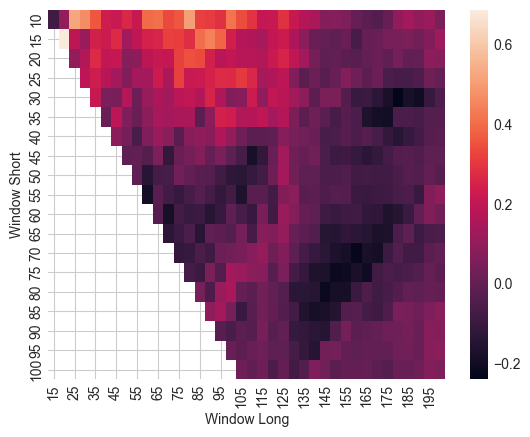

In [5]:
metric = 'calmar_ratio'
display(df_bt.loc[(1 * df_bt[metric]).sort_values(ascending=False)[:5].index])
this = pd.pivot(df_bt, index="Window Short", columns="Window Long", values=metric)
sns.heatmap(this)

In [6]:
window_short = 15
window_long = 20
idx = df_bt.loc[(df_bt['Window Short']==window_short)&(df_bt['Window Long']==window_long)].index[0]
this_obj = df_bt.loc[idx, 'Bt Obj']

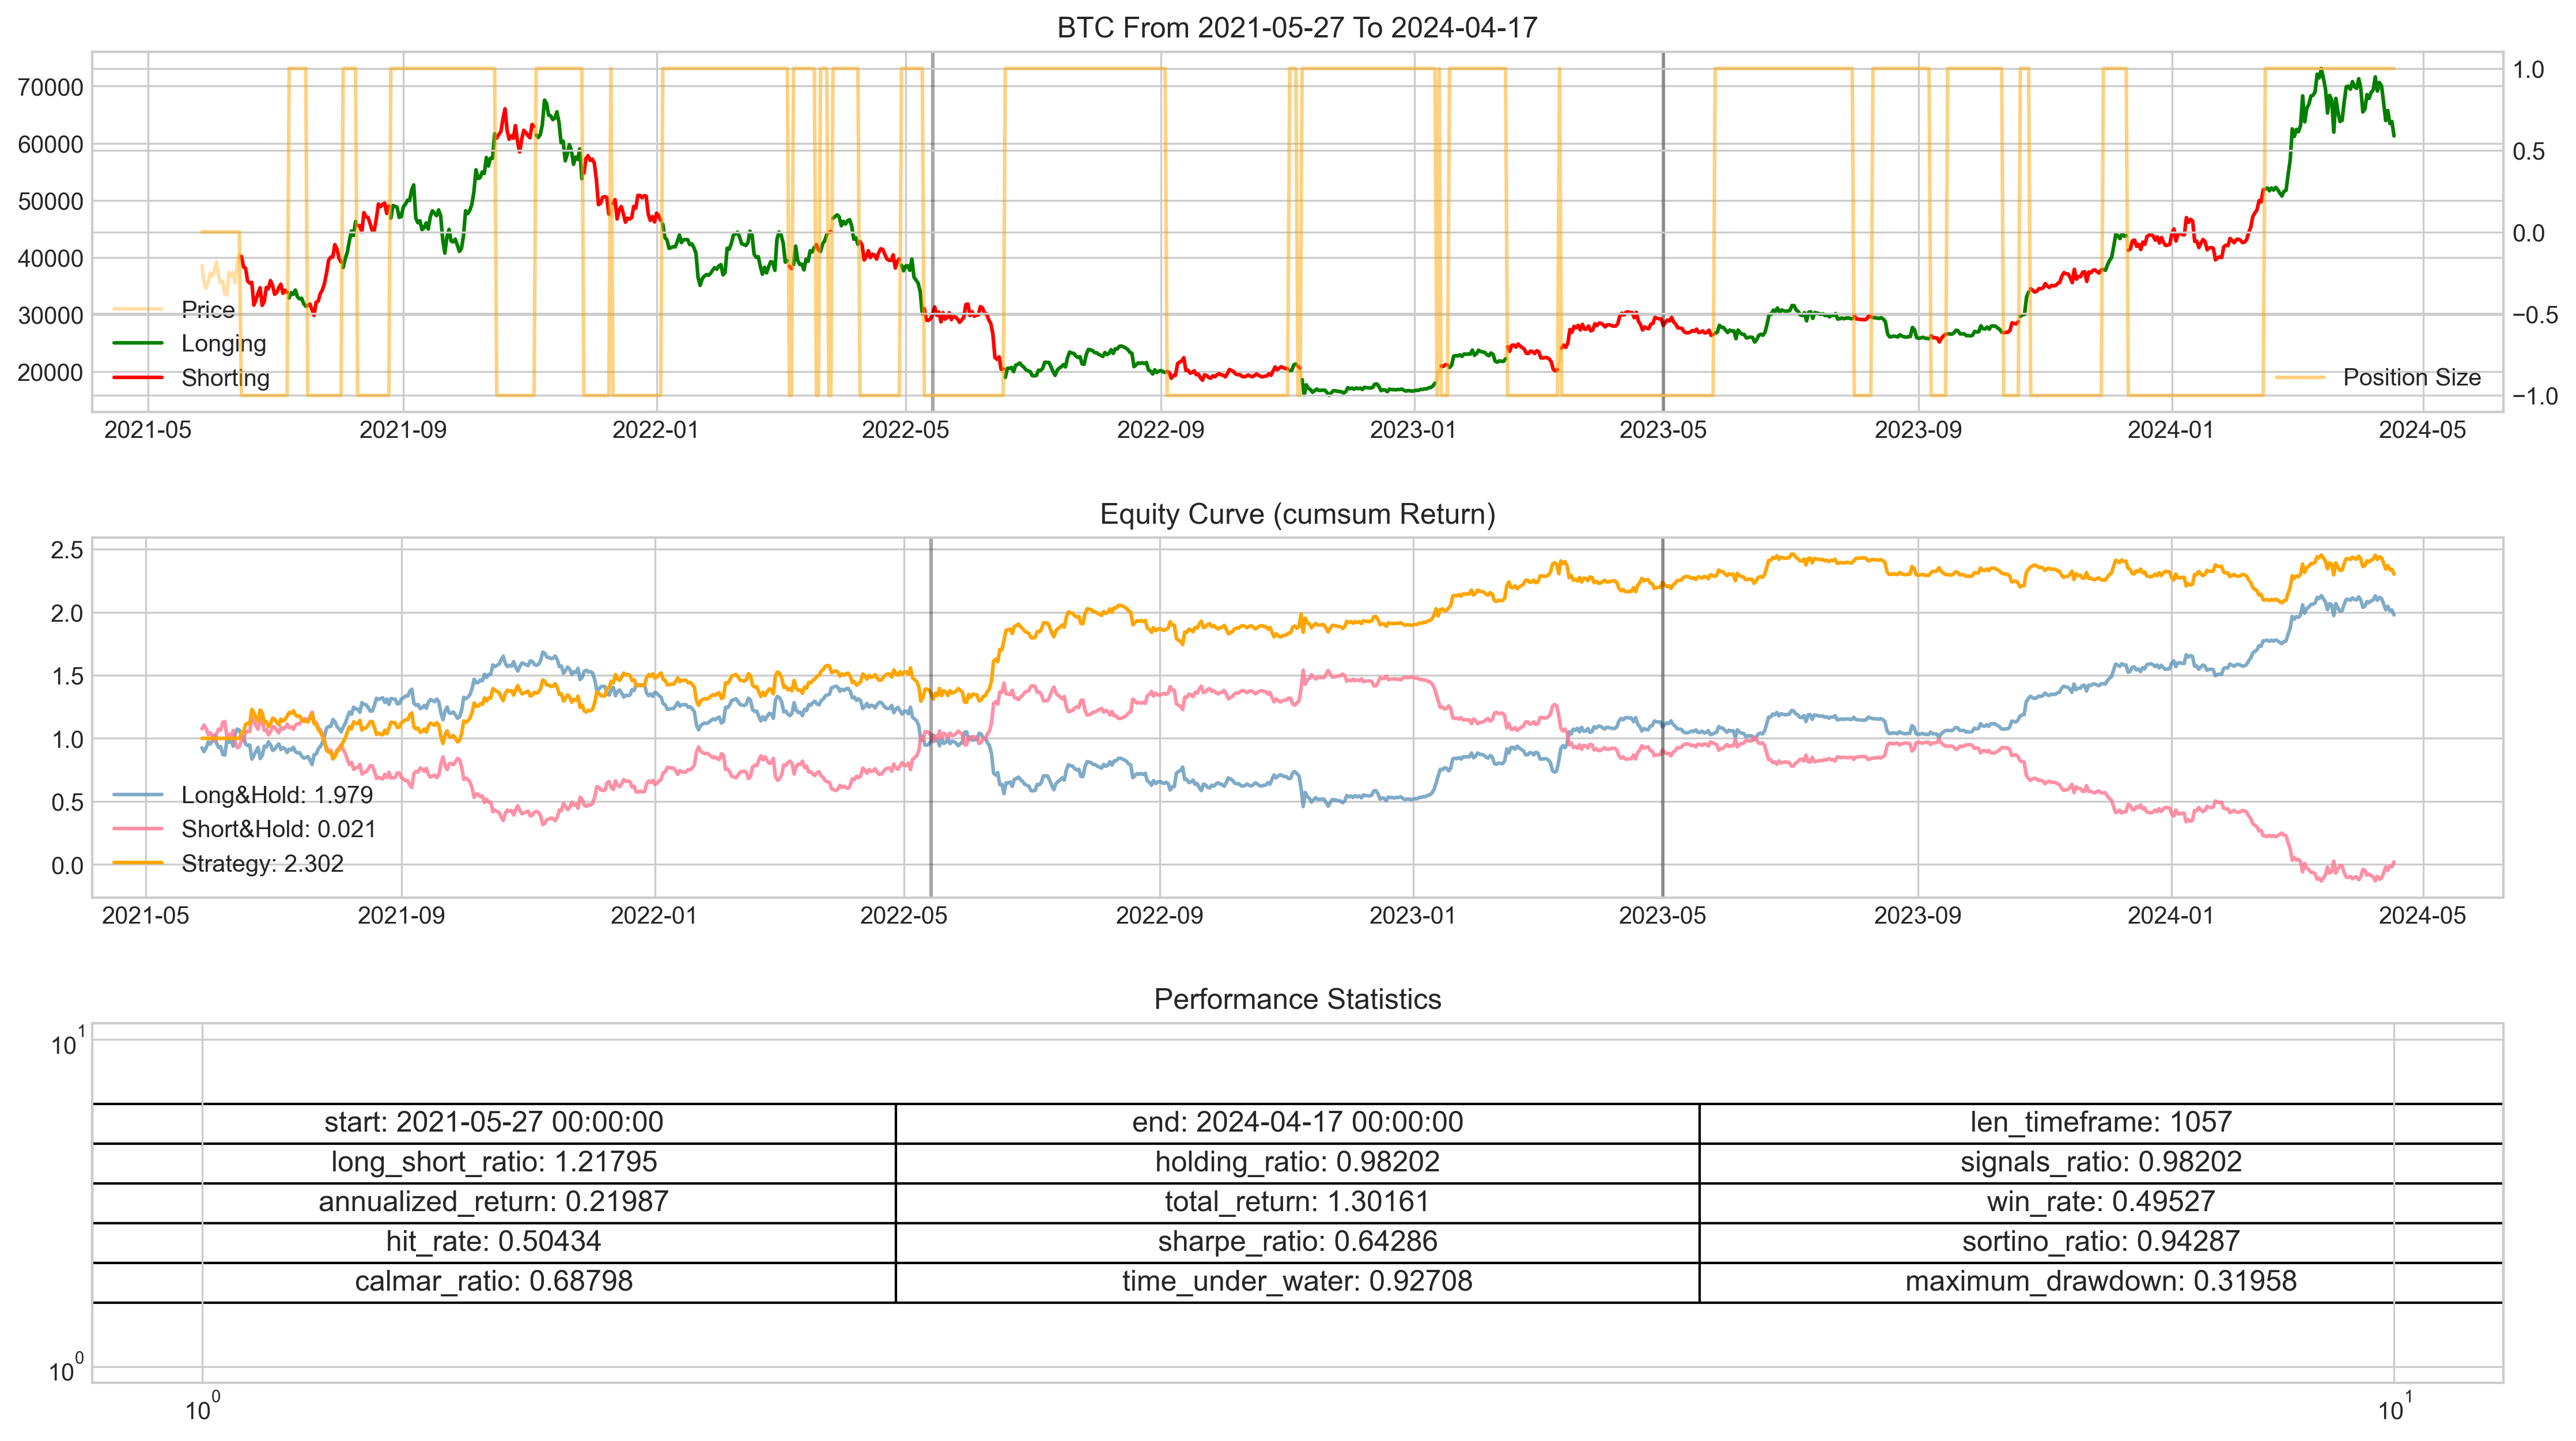

In [7]:
this_obj.plot_general()

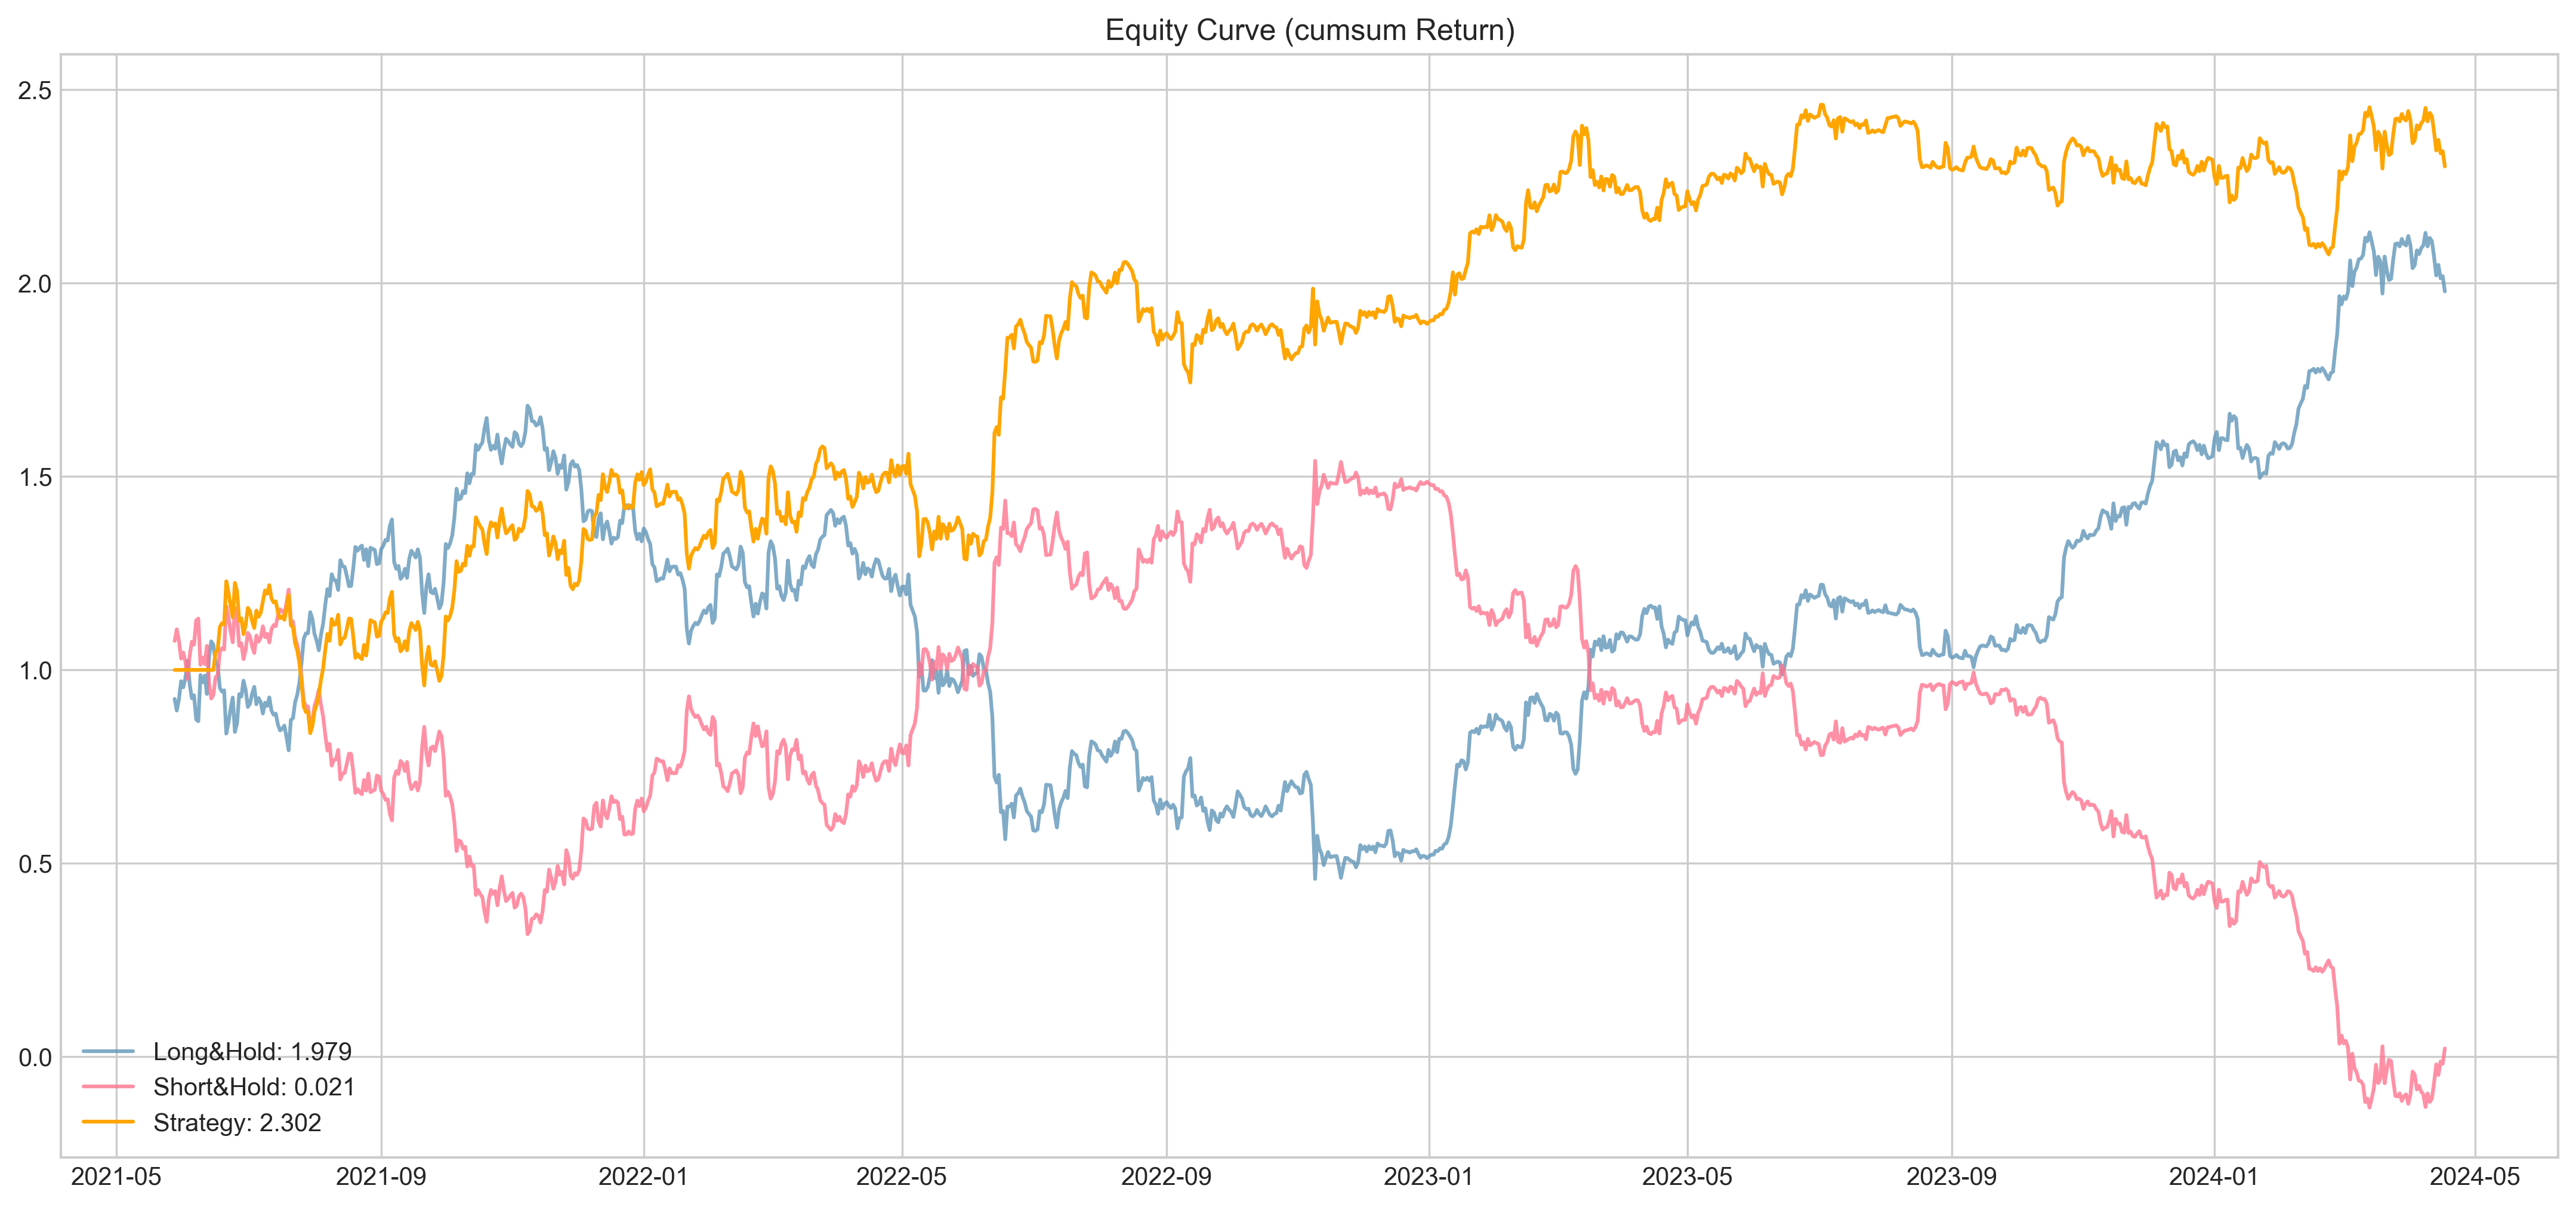

In [8]:
this_obj.plot_equityCurve()